# Heart Failure Prediction

Dataset: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

## Step 1: Data Loading

In [1]:
import pandas as pd

df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Step 2: Data Inspection

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RestingBP'}>,
        <Axes: title={'center': 'Cholesterol'}>],
       [<Axes: title={'center': 'FastingBS'}>,
        <Axes: title={'center': 'MaxHR'}>,
        <Axes: title={'center': 'Oldpeak'}>],
       [<Axes: title={'center': 'HeartDisease'}>, <Axes: >, <Axes: >]],
      dtype=object)

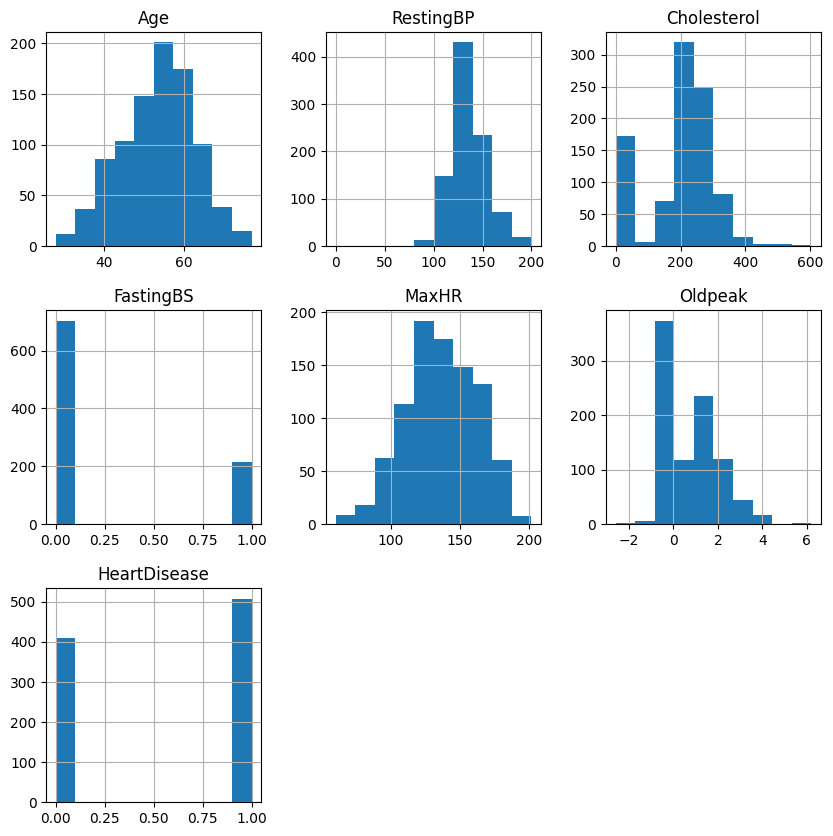

In [3]:
df.hist(figsize=(10, 10))

## Step 3: Data Cleaning

In [4]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [5]:
df['ChestPainType'].value_counts()

,count
ChestPainType,
ASY,496
NAP,203
ATA,173
TA,46


In [6]:
# Binary: Sex, ExerciseAngina
df['Sex'] = df['Sex'].map({'F': 0, 'M': 1})
df['ExerciseAngina'] = df['ExerciseAngina'].map({'N': 0, 'Y': 1})

In [7]:
# One-hot encoding: ChestPainType, RestingECG, ST_Slope
df = df.join(pd.get_dummies(df['ChestPainType'], prefix='ChestPainType', dtype=int)).drop(['ChestPainType'], axis=1)
df = df.join(pd.get_dummies(df['RestingECG'], prefix='RestingECG', dtype=int)).drop(['RestingECG'], axis=1)
df = df.join(pd.get_dummies(df['ST_Slope'], prefix='ST_Slope', dtype=int)).drop(['ST_Slope'], axis=1)

In [8]:
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,0,1,0,0,0,1,0,0,0,1
1,49,0,160,180,0,156,0,1.0,1,0,0,1,0,0,1,0,0,1,0
2,37,1,130,283,0,98,0,0.0,0,0,1,0,0,0,0,1,0,0,1
3,48,0,138,214,0,108,1,1.5,1,1,0,0,0,0,1,0,0,1,0
4,54,1,150,195,0,122,0,0.0,0,0,0,1,0,0,1,0,0,0,1


array([[<Axes: title={'center': 'Age'}>, <Axes: title={'center': 'Sex'}>,
        <Axes: title={'center': 'RestingBP'}>,
        <Axes: title={'center': 'Cholesterol'}>],
       [<Axes: title={'center': 'FastingBS'}>,
        <Axes: title={'center': 'MaxHR'}>,
        <Axes: title={'center': 'ExerciseAngina'}>,
        <Axes: title={'center': 'Oldpeak'}>],
       [<Axes: title={'center': 'HeartDisease'}>,
        <Axes: title={'center': 'ChestPainType_ASY'}>,
        <Axes: title={'center': 'ChestPainType_ATA'}>,
        <Axes: title={'center': 'ChestPainType_NAP'}>],
       [<Axes: title={'center': 'ChestPainType_TA'}>,
        <Axes: title={'center': 'RestingECG_LVH'}>,
        <Axes: title={'center': 'RestingECG_Normal'}>,
        <Axes: title={'center': 'RestingECG_ST'}>],
       [<Axes: title={'center': 'ST_Slope_Down'}>,
        <Axes: title={'center': 'ST_Slope_Flat'}>,
        <Axes: title={'center': 'ST_Slope_Up'}>, <Axes: >]], dtype=object)

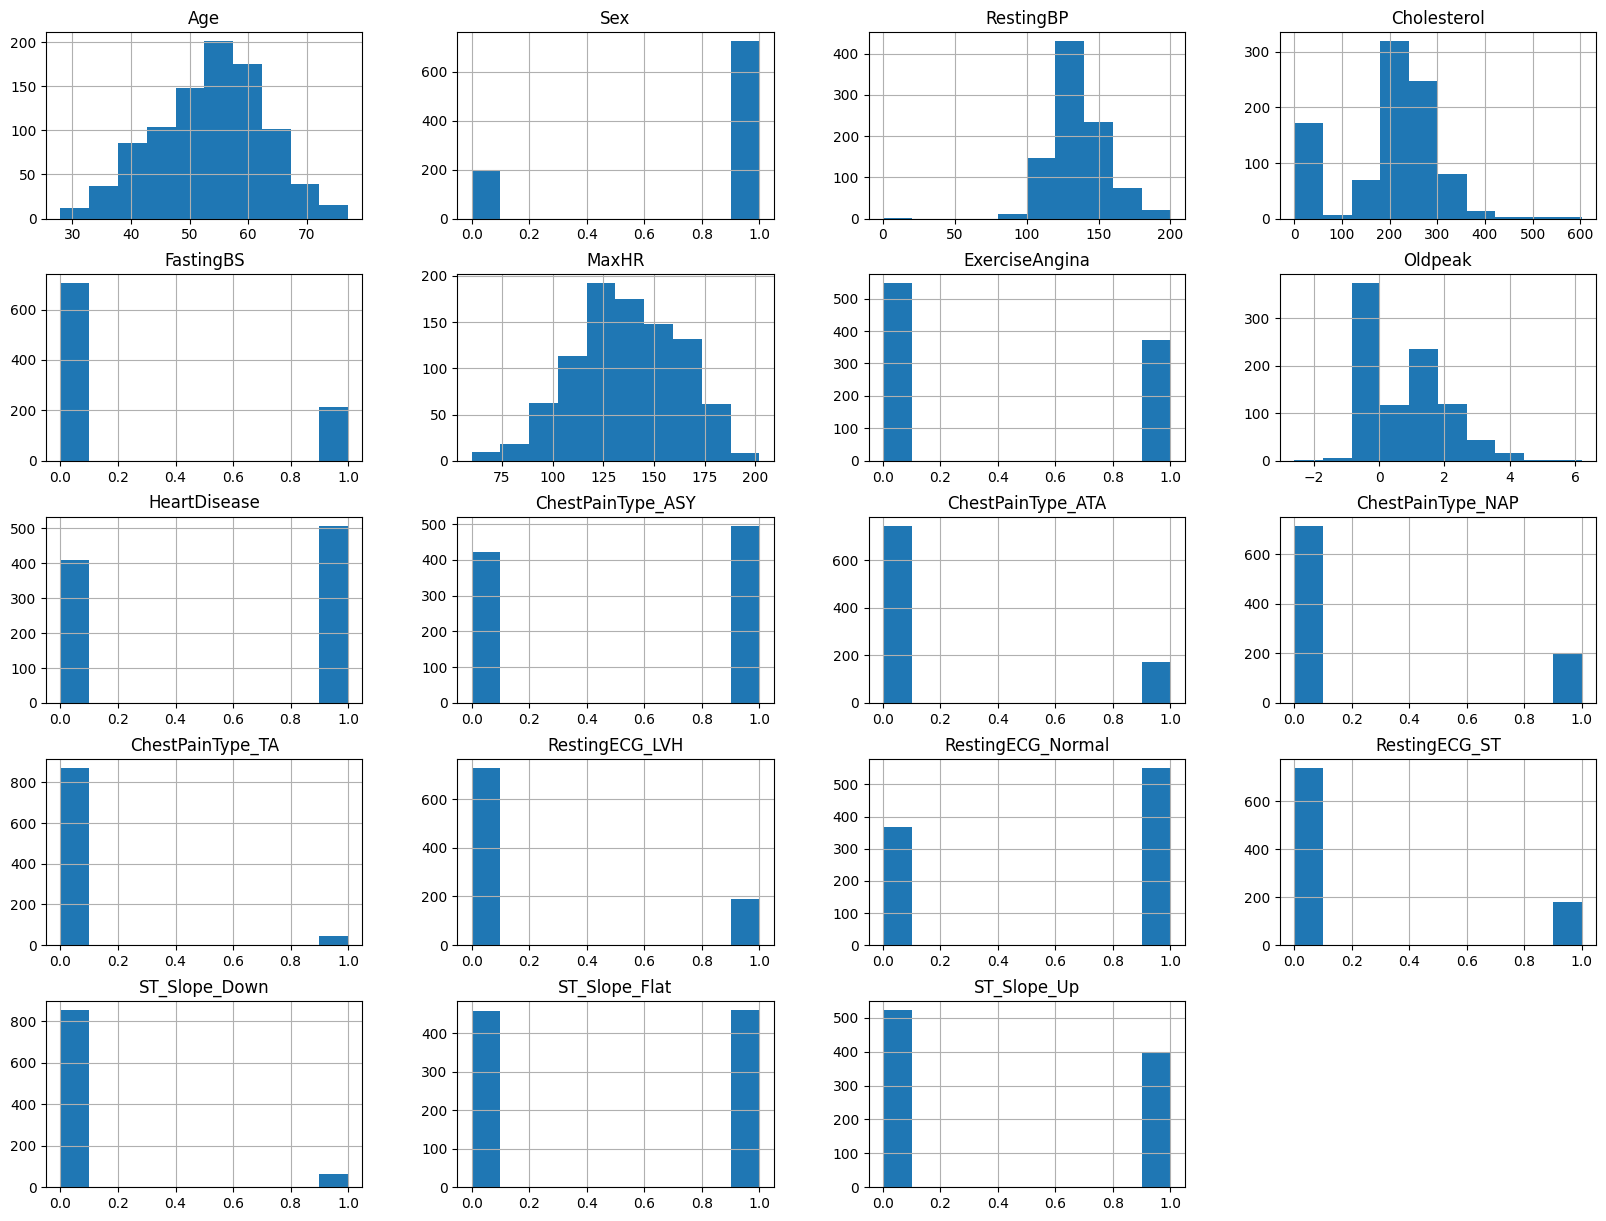

In [9]:
df.hist(figsize=(20, 15))

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   Sex                918 non-null    int64  
 2   RestingBP          918 non-null    int64  
 3   Cholesterol        918 non-null    int64  
 4   FastingBS          918 non-null    int64  
 5   MaxHR              918 non-null    int64  
 6   ExerciseAngina     918 non-null    int64  
 7   Oldpeak            918 non-null    float64
 8   HeartDisease       918 non-null    int64  
 9   ChestPainType_ASY  918 non-null    int64  
 10  ChestPainType_ATA  918 non-null    int64  
 11  ChestPainType_NAP  918 non-null    int64  
 12  ChestPainType_TA   918 non-null    int64  
 13  RestingECG_LVH     918 non-null    int64  
 14  RestingECG_Normal  918 non-null    int64  
 15  RestingECG_ST      918 non-null    int64  
 16  ST_Slope_Down      918 non

## Step 4: Train Machine Learning Model

### Define Feature & Target Data

In [11]:
X, y = df.drop(['HeartDisease'], axis=1), df['HeartDisease']

### Train Test Split

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Train Model

#### Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

##### Evaluate Model Score

In [14]:
log_model.score(X_test, y_test)

0.8369565217391305

#### Random Forrest Classifier

In [15]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, y_train)

RandomForestClassifier()

##### Evaluate Model *Score*

In [16]:
rfc_model.score(X_test, y_test)

0.8532608695652174

### Models Comparison

In [17]:
print(f"Logistic Regression Score: {log_model.score(X_test, y_test)}")
print(f"Random Forest Classifier Score: {rfc_model.score(X_test, y_test)}")

Logistic Regression Score: 0.8369565217391305
Random Forest Classifier Score: 0.8532608695652174
